In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')

In [18]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [19]:
len(df['country'].unique())

211

<Axes: >

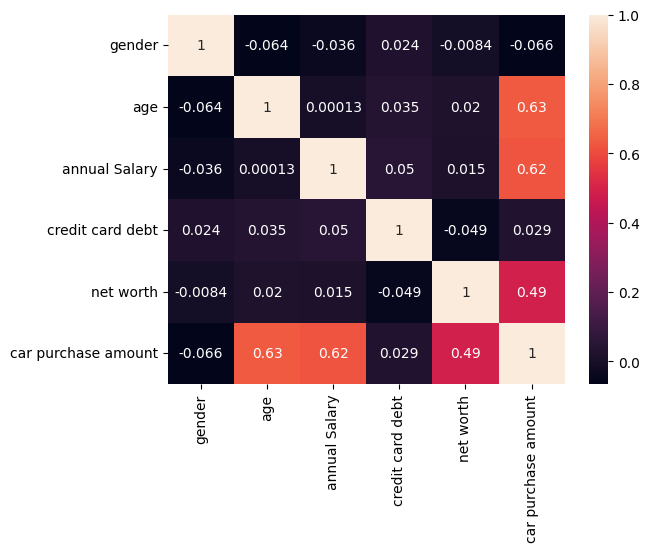

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='car purchase amount', ylabel='age'>

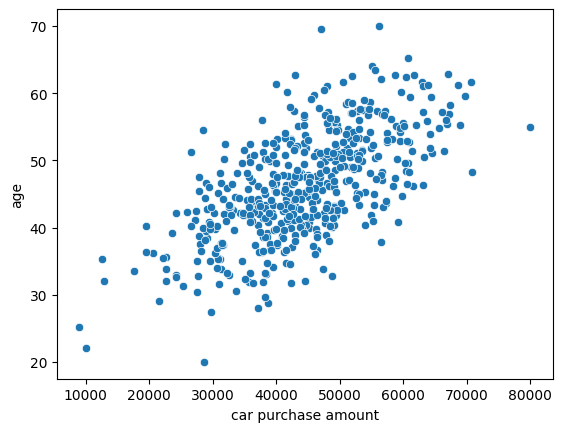

In [21]:
sns.scatterplot(data=df, y='age', x='car purchase amount')

<Axes: xlabel='car purchase amount', ylabel='annual Salary'>

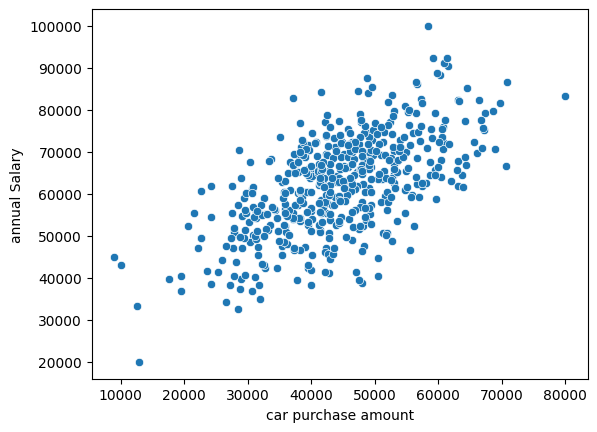

In [22]:
sns.scatterplot(data=df, y='annual Salary', x='car purchase amount')

In [23]:
df = df.drop(['customer name', 'customer e-mail'], axis=1)

In [24]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [25]:
dummies = pd.get_dummies(df['country'], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df = df.drop('country', axis=1)

In [27]:
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,Algeria,American Samoa,Andorra,Angola,...,Venezuela,Viet Nam,"Virgin Islands, British","Virgin Islands, United States",Wallis and Futuna,Western Sahara,Yemen,Zimbabwe,marlal,Åland Islands
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [29]:
scaler = MinMaxScaler()

In [31]:
# help(train_test_split)

In [32]:
X = df.drop('car purchase amount', axis=1).values
y = df['car purchase amount'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [34]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
X_train.shape

(400, 215)

In [36]:
model = Sequential()

model.add(Dense(units=215, activation='relu'))
model.add(Dense(units=215, activation='relu'))
model.add(Dense(units=215, activation='relu'))
model.add(Dense(units=215, activation='relu'))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [37]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=128, epochs=400)

Epoch 1/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 2079821696.0000 - val_loss: 2005647488.0000
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2062213632.0000 - val_loss: 2005504512.0000
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2111083008.0000 - val_loss: 2005151744.0000
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2030971648.0000 - val_loss: 2004333568.0000
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2107007360.0000 - val_loss: 2002578176.0000
Epoch 6/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2085497216.0000 - val_loss: 1999037184.0000
Epoch 7/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2070670720.0000 - val_loss: 1992269824.0000
Epoch 8/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2055335936.0000 - val_loss: 1979929088.0000
Epoch 9/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2047993728.0000 - val_loss: 1958369408.0000
Epoch 10/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2028813184.0000 - val_los

In [38]:
losses = pd.DataFrame(model.history.history)

<Axes: >

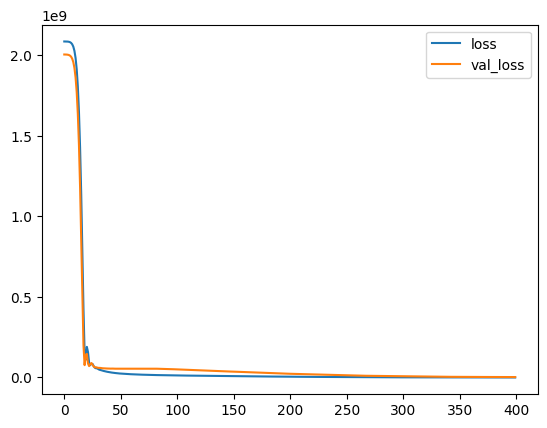

In [39]:
losses.plot()

In [41]:
preds = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [42]:
mse = mean_squared_error(y_test, preds)

In [43]:
mse

2663437.8282634956

In [44]:
mae = mean_absolute_error(y_test, preds)

In [45]:
mae

958.3364710375005

In [46]:
np.sqrt(mse)

1632.0042365948366

In [48]:
df['car purchase amount'].describe()

count      500.000000
mean     44209.799218
std      10773.178744
min       9000.000000
25%      37629.896040
50%      43997.783390
75%      51254.709517
max      80000.000000
Name: car purchase amount, dtype: float64

In [50]:
explained_variance_score(y_test, preds)

0.9751338564963069

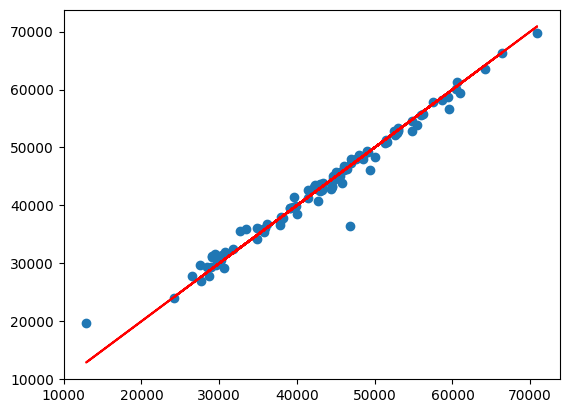

In [51]:
plt.scatter(y_test, preds)
plt.plot(y_test, y_test, 'r')

In [52]:
car_info = df.drop('car purchase amount', axis=1).iloc[0]

In [53]:
car_info

gender                        0
age                    41.85172
annual Salary       62812.09301
credit card debt    11609.38091
net worth           238961.2505
                       ...     
Western Sahara            False
Yemen                     False
Zimbabwe                  False
marlal                    False
Åland Islands             False
Name: 0, Length: 215, dtype: object

In [54]:
car_info.values.reshape(-1, 215)

array([[0, 41.8517198, 62812.09301, 11609.38091, 238961.2505, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        F

In [57]:
car_info = scaler.transform(car_info.values.reshape(-1, 215))

In [58]:
model.predict(car_info)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[35566.15]], dtype=float32)

In [60]:
df.iloc[0]['car purchase amount']

35321.45877